# basics and and data anaylise
## Data as per the given by the Raghu

In [0]:
import pandas as pd
import numpy as np
uber = pd.read_csv('./uberdrive.csv')

FileNotFoundError: ignored

In [0]:
uber

NameError: ignored

In [0]:
uber.groupby(['START','STOP']).describe()

In [0]:
df2 = uber[uber['START'] != 'Unknown Location']
df2

In [0]:
df2[df2['STOP'] != 'Unknown Location']
df2

## describe will gives basic statisctic from out of basic statistics, we pulling the data i.e **miles** by adding new column called count

In [0]:
uber.groupby(['START','STOP']).describe()['MILES'][['count']]

In [0]:
uber.groupby(['START','STOP']).describe()['MILES'][['count']].sort_values(ascending=False,by='count')

# Anthor way to find out hte most popular start stop pair 

In [0]:
df2.groupby(['START','STOP']).size()

In [0]:
df2.groupby(['START','STOP']).size().sort_values(ascending=False).head(10)

# Manuipulating date & time object

In [0]:
# start date and end date have string format and convert it to datatime object
from datetime import datetime 
import pandas as pd

# START DATE and END_DATE have string format. Convert it to datetime object

uber.loc[:, 'START_DATE'] = uber.loc[:1154,'START_DATE'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
uber.loc[:, 'END_DATE'] = uber.loc[:1154,'END_DATE'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [0]:
uber.info()

In [0]:
#Calcute the duration for the rides
uber['DIFF'] = uber['START_DATE'] - uber['END_DATE']
uber.head()

In [0]:
#convert duration to number(minutes)

uber[:,'DIFF'] = uber['DIFF'].apply(lambda x: pd.Timedelta.to_timedelta64(x).day/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [0]:
#convert duration to numbers(minutes)
uber.loc[:, 'DIFF'] = uber.loc[:1154,'DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [0]:
#convert duration to numbers(minutes)
uber.loc[:1154, 'DIFF'] = uber['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [0]:
uber['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [0]:
#convert duration to numbers(minutes)
df.loc[:, 'DIFF'] = uber['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [0]:
import pandas as pd
honey = pd.read_csv('./honeyproduction.csv')

In [0]:
honey

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
honey.head()

In [0]:
honey.describe()

In [0]:
honey.columns

In [0]:
honey.describe().transpose()

In [0]:
honey.info()

In [0]:
honey['state'].nunique()

In [0]:
honey['state'].unique() # list all unique states

In [0]:
# calculate the average production for each state across all yeare
honey[['state','totalprod']].groupby('state').mean().round().sort_values(by='totalprod',ascending=False).head(4)

In [0]:
honey[['state','totalprod']].groupby('state').mean().round()

In [0]:
honey.info()

In [0]:
honey['year'].nunique()

In [0]:
honey['year'].unique()

In [0]:
honey['year'].max()

In [0]:
honey['year'].min()

In [0]:
honey[honey['totalprod'] == honey['totalprod'].max()]

In [0]:
# What is the average yield per colony 
honey[['year','yieldpercol']].groupby('year').mean().round()

In [0]:
import seaborn as sns
sns.pairplot(honey[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']])

In [0]:
cor = honey[['numcol', 
              'yieldpercol', 
              'totalprod', 
              'stocks', 
              'priceperlb', 
              'prodvalue']].corr()

cor

In [0]:
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)

In [0]:

#### What is the general Production trend from 1998 to 2012? Describe visually

In [0]:
sns.pointplot(honey['year'],honey['totalprod'])

In [0]:
#### How is the production trend for each State? Describe visually - Hint (Use sns.FacetGrid() & g.map() functions)

In [0]:
g = sns.FacetGrid(honey, col="state", col_wrap=10, size=3)
g = g.map(plt.plot, "year", "totalprod", marker=".")

#### Is there a linear relationship between the Number of Colonies & Value in Production? Check at an overall level, at state and year levels as well

In [0]:
sns.lmplot(x="numcol", y="prodvalue", data=honey)

In [0]:
sns.lmplot(x='numcol',y='prodvalue',data=honey,hue='state')

In [0]:
sns.lmplot(x='numcol',y='prodvalue',data=honey,hue='year')

In [0]:
#### Check the distribution of total prodcution across each year using boxplots

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot('year','totalprod',data=honey)

In [0]:
#### How has the Value in Production changed over the years?

In [0]:
sns.pointplot(honey['year'],honey['prodvalue'])

#### What is the linear relationship between Production volume & value over the years?

In [0]:
sns.lmplot(x="totalprod", y="prodvalue", data=honey)

# Source : spipy2019
Introduction to Data Processing in python
Duration: 3hour

In [0]:
import pandas as pd
pd.__version__

'0.25.3'

In [0]:
df = pd.read_csv('/content/sample_data/gapminder.tsv',sep='\t')

In [0]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [0]:
df.shape

(1704, 6)

In [0]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [0]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
df.info

<bound method DataFrame.info of           country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]>

In [0]:
df.nunique

<bound method DataFrame.nunique of           country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]>

In [0]:
df.tail

<bound method NDFrame.tail of           country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]>

In [0]:
df.index

RangeIndex(start=0, stop=1704, step=1)

In [0]:
df.keys

<bound method NDFrame.keys of           country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]>

In [0]:
df.values # body of Dataframe

array([['Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145],
       ['Afghanistan', 'Asia', 1957, 30.331999999999997, 9240934,
        820.8530296],
       ['Afghanistan', 'Asia', 1962, 31.997, 10267083, 853.1007099999999],
       ...,
       ['Zimbabwe', 'Africa', 1997, 46.809, 11404948, 792.4499602999999],
       ['Zimbabwe', 'Africa', 2002, 39.989000000000004, 11926563,
        672.0386227000001],
       ['Zimbabwe', 'Africa', 2007, 43.486999999999995, 12311143,
        469.70929810000007]], dtype=object)

In [0]:
df.values[[0]]

array([['Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145]],
      dtype=object)

In [0]:
df.values[4]

array(['Afghanistan', 'Asia', 1972, 36.088, 13079460, 739.9811057999999],
      dtype=object)

In [0]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [0]:
#subset dataframe
country = df['country']
country # each column in dataframe is series

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [0]:
country = df[['country']] # if passed in [[]] the output will be the dataframe
country

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [0]:
df.drop(['continent','country'],axis='columns') # inplace

,year,lifeExp,pop,gdpPercap
0,1952,28.801,8425333,779.445314
1,1957,30.332,9240934,820.853030
2,1962,31.997,10267083,853.100710
3,1967,34.020,11537966,836.197138
4,1972,36.088,13079460,739.981106
...,...,...,...,...
1699,1987,62.351,9216418,706.157306
1700,1992,60.377,10704340,693.420786
1701,1997,46.809,11404948,792.449960
1702,2002,39.989,11926563,672.038623


In [0]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [0]:
df.loc[0] # accessing the first row

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [0]:
df.loc[[0, 1]] # pd.loc has -1 index 

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030


In [0]:
df.loc[-1] # no negative index

KeyError: ignored

# Here note is 
- pandas.loc --> accessing or subsetting pandas with lebels(rows(row number it's start from zero),column name(as per data))

- pandas.iloc --> subsetting based on default index both(rows,columns are number) zero indexing is available)

In [0]:
df.iloc[[0,1, -1]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [0]:
subset = df.iloc[:,['year','pop']] # .iloc matcing the index 

IndexError: ignored

In [0]:
subset = df.iloc[:,[2,4]] # .iloc matcing the index 
subset

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
...,...,...
1699,1987,9216418
1700,1992,10704340
1701,1997,11404948
1702,2002,11926563


In [0]:
df.loc[df['country'] == 'United States'].count()

country      12
continent    12
year         12
lifeExp      12
pop          12
gdpPercap    12
dtype: int64

In [0]:
df.loc[df['country'] == 'United States','year']



1608    1952
1609    1957
1610    1962
1611    1967
1612    1972
1613    1977
1614    1982
1615    1987
1616    1992
1617    1997
1618    2002
1619    2007
Name: year, dtype: int64

In [0]:
df.loc[df['country'] == 'United States',:].count()



country      12
continent    12
year         12
lifeExp      12
pop          12
gdpPercap    12
dtype: int64

In [0]:
df.loc[(df['country'] == 'United States') & (df['year'] == 1982)]

,country,continent,year,lifeExp,pop,gdpPercap
1614,United States,Americas,1982,74.65,232187835,25009.55914


In [0]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [0]:
df.loc[df['country'] == 'india']

,country,continent,year,lifeExp,pop,gdpPercap


In [0]:
df.loc[(df['continent'] == 'Asia') & (df['gdpPercap'] > 500)]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


# Groupby()
- groupby('year') --> accessing the only one columns
- groupby(['year','age']) ---> accessing the more than one column

- till now it won't show any dataframe, it create special type of dataframe

- groupby(['year','pop']['life'].mean() : upto now it show the data 

- with out aggregation funtion: groupby won't show any operation 

In [0]:
df.groupby('year')

# if u overcome the stacking i.e multiple index for the all rows we need to reset the index 

In [0]:
df.groupby(['year','pop'])['lifeExp'].mean()
# if u overcome the stacking i.e multiple index for the all rows we need to reset the index 

year  pop       
1952  60011         46.471
      63149         34.812
      120447        50.939
      147962        72.490
      153936        40.715
                     ...  
2007  190010647     72.390
      223547000     70.650
      301139947     78.242
      1110396331    64.698
      1318683096    72.961
Name: lifeExp, Length: 1704, dtype: float64

# if u overcome the stacking i.e multiple index for the all rows we need to reset the index 

- Now we can access regular index 

In [0]:
df.groupby(['year','pop'])['lifeExp'].mean().reset_index()
# if u overcome the stacking i.e multiple index for the all rows we need to reset the index 

,year,pop,lifeExp
0,1952,60011,46.471
1,1952,63149,34.812
2,1952,120447,50.939
3,1952,147962,72.490
4,1952,153936,40.715
...,...,...,...
1699,2007,190010647,72.390
1700,2007,223547000,70.650
1701,2007,301139947,78.242
1702,2007,1110396331,64.698


In [0]:
import pandas as pd
pew = pd.read_csv('/content/sample_data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [0]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [0]:
# melt will transpose will trasform will colums into singile rows
pd.melt(pew, id_vars=['religion']) # id_values that has to ignore.
# id_vars --> no need to touch this while transform

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [0]:
pd.melt(pew,id_vars=['religion'])

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [0]:
pew_tidy = pew.melt(id_vars='religion',var_name='income',value_name='count')

In [0]:
pew_tidy.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [0]:
billboard = pd.read_csv('/content/sample_data/billboard.csv')

In [0]:
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16,wk17,wk18,wk19,wk20,wk21,wk22,wk23,wk24,wk25,wk26,wk27,wk28,wk29,wk30,wk31,wk32,wk33,wk34,wk35,...,wk37,wk38,wk39,wk40,wk41,wk42,wk43,wk44,wk45,wk46,wk47,wk48,wk49,wk50,wk51,wk52,wk53,wk54,wk55,wk56,wk57,wk58,wk59,wk60,wk61,wk62,wk63,wk64,wk65,wk66,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,94.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0,51.0,47.0,44.0,38.0,28.0,22.0,18.0,18.0,14.0,12.0,7.0,6.0,6.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,...,5.0,9.0,9.0,15.0,14.0,13.0,14.0,16.0,17.0,21.0,22.0,24.0,28.0,33.0,42.0,42.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,65.0,55.0,59.0,62.0,61.0,61.0,59.0,61.0,66.0,72.0,76.0,75.0,67.0,73.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,31.0,36.0,49.0,53.0,57.0,64.0,70.0,75.0,76.0,78.0,85.0,92.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,79.0,88.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,78.0,74.0,78.0,85.0,89.0,97.0,96.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
billboard.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

# melt : will combine the similar columns, make as one column

# Unpivot a DataFrame from wide format to long format, optionally leaving identifier variables set.

**This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.** 

In [0]:
billboard.info
billboard.tail(2)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16,wk17,wk18,wk19,wk20,wk21,wk22,wk23,wk24,wk25,wk26,wk27,wk28,wk29,wk30,wk31,wk32,wk33,wk34,wk35,...,wk37,wk38,wk39,wk40,wk41,wk42,wk43,wk44,wk45,wk46,wk47,wk48,wk49,wk50,wk51,wk52,wk53,wk54,wk55,wk56,wk57,wk58,wk59,wk60,wk61,wk62,wk63,wk64,wk65,wk66,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,matchbox twenty,Bent,4:12,2000-04-29,60,37.0,29.0,24.0,22.0,21.0,18.0,16.0,13.0,12.0,8.0,6.0,1.0,2.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,4.0,6.0,9.0,12.0,13.0,19.0,20.0,20.0,24.0,29.0,28.0,27.0,30.0,33.0,...,38.0,38.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
billboard.melt(id_vars=['year','artist','track','time'],value_name = 'rank',\
               var_name = 'week')
# var_name is the name the variable i.e categorical or columns in the df
# value_name is the cell value to correspong the varaible names

,year,artist,track,time,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,date.entered,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,date.entered,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,date.entered,2000-04-08
3,2000,3 Doors Down,Loser,4:24,date.entered,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,date.entered,2000-04-15
...,...,...,...,...,...,...
24404,2000,Yankee Grey,Another Nine Minutes,3:10,wk76,NaN
24405,2000,"Yearwood, Trisha",Real Live Woman,3:55,wk76,NaN
24406,2000,Ying Yang Twins,Whistle While You Tw...,4:19,wk76,NaN
24407,2000,Zombie Nation,Kernkraft 400,3:30,wk76,NaN


In [0]:
billboard.melt(id_vars=['year','artist','track','time','date.entered'],value_name = 'rank',var_name = 'week')

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [0]:
billboard.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [0]:
# as pipe line
(billboard
 .melt(id_vars=['year','artist','track','time','date.entered'],
    value_name = 'rank',
    var_name = 'week')
 .groupby('artist')['rank']
 .mean()
 )

artist
2 Pac               85.428571
2Ge+her             90.000000
3 Doors Down        37.602740
504 Boyz            56.222222
98^0                37.650000
                      ...    
Yankee Grey         83.125000
Yearwood, Trisha    84.166667
Ying Yang Twins     88.857143
Zombie Nation       99.000000
matchbox twenty     18.641026
Name: rank, Length: 228, dtype: float64

In [0]:
# as pipe line
(billboard.melt(id_vars=['year','artist','track','time','date.entered'],value_name = 'rank',var_name = 'week').groupby('artist')['rank'].mean())

artist
2 Pac               85.428571
2Ge+her             90.000000
3 Doors Down        37.602740
504 Boyz            56.222222
98^0                37.650000
                      ...    
Yankee Grey         83.125000
Yearwood, Trisha    84.166667
Ying Yang Twins     88.857143
Zombie Nation       99.000000
matchbox twenty     18.641026
Name: rank, Length: 228, dtype: float64

In [0]:
billboard.melt(id_vars=['year','artist','track','time','date.entered'] ,value_name = 'rank',var_name = 'week')\
.groupby('artist')['rank'].mean()

artist
2 Pac               85.428571
2Ge+her             90.000000
3 Doors Down        37.602740
504 Boyz            56.222222
98^0                37.650000
                      ...    
Yankee Grey         83.125000
Yearwood, Trisha    84.166667
Ying Yang Twins     88.857143
Zombie Nation       99.000000
matchbox twenty     18.641026
Name: rank, Length: 228, dtype: float64

In [0]:
ebola = pd.read_csv('/content/sample_data/country_timeseries.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [0]:
ebola.dtypes

Date                    object
Day                      int64
Cases_Guinea           float64
Cases_Liberia          float64
Cases_SierraLeone      float64
Cases_Nigeria          float64
Cases_Senegal          float64
Cases_UnitedStates     float64
Cases_Spain            float64
Cases_Mali             float64
Deaths_Guinea          float64
Deaths_Liberia         float64
Deaths_SierraLeone     float64
Deaths_Nigeria         float64
Deaths_Senegal         float64
Deaths_UnitedStates    float64
Deaths_Spain           float64
Deaths_Mali            float64
dtype: object

In [0]:
ebola.nunique()

Date                   122
Day                    122
Cases_Guinea            88
Cases_Liberia           69
Cases_SierraLeone       71
Cases_Nigeria           13
Cases_Senegal            2
Cases_UnitedStates       4
Cases_Spain              1
Cases_Mali               5
Deaths_Guinea           89
Deaths_Liberia          66
Deaths_SierraLeone      66
Deaths_Nigeria           9
Deaths_Senegal           1
Deaths_UnitedStates      2
Deaths_Spain             2
Deaths_Mali              4
dtype: int64

In [0]:
# percentge of nulls present in the country_timeseries
(ebola.isnull().sum() / ebola.shape[0]) 

Date                   0.000000
Day                    0.000000
Cases_Guinea           0.237705
Cases_Liberia          0.319672
Cases_SierraLeone      0.286885
Cases_Nigeria          0.688525
Cases_Senegal          0.795082
Cases_UnitedStates     0.852459
Cases_Spain            0.868852
Cases_Mali             0.901639
Deaths_Guinea          0.245902
Deaths_Liberia         0.336066
Deaths_SierraLeone     0.286885
Deaths_Nigeria         0.688525
Deaths_Senegal         0.819672
Deaths_UnitedStates    0.852459
Deaths_Spain           0.868852
Deaths_Mali            0.901639
dtype: float64

In [0]:
(ebola.isnull().sum() / ebola.shape[0]) * 100

Date                    0.000000
Day                     0.000000
Cases_Guinea           23.770492
Cases_Liberia          31.967213
Cases_SierraLeone      28.688525
Cases_Nigeria          68.852459
Cases_Senegal          79.508197
Cases_UnitedStates     85.245902
Cases_Spain            86.885246
Cases_Mali             90.163934
Deaths_Guinea          24.590164
Deaths_Liberia         33.606557
Deaths_SierraLeone     28.688525
Deaths_Nigeria         68.852459
Deaths_Senegal         81.967213
Deaths_UnitedStates    85.245902
Deaths_Spain           86.885246
Deaths_Mali            90.163934
dtype: float64

In [0]:
ebola_long = ebola.melt(id_vars=['Date','Day'],var_name='cd_country',value_name='count')
ebola_long

,Date,Day,cd_country,count
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [0]:
ebola_long.head()

,Date,Day,cd_country,count
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [0]:
var_split = ebola_long['cd_country'].str.split('_')

In [0]:
var_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: cd_country, Length: 1952, dtype: object

In [0]:
status = var_split.str.get(0)

In [0]:
country = var_split.str.get(1)

In [0]:
ebola_long['status'] = status
ebola_long['country'] = country

In [0]:
ebola_long

,Date,Day,cd_country,count,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [0]:
ebola_long.head()

,Date,Day,cd_country,count,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [0]:
var_split_df = ebola_long['cd_country'].str.split('_',expand=True)

In [0]:
var_split_df

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [0]:
ebola_long[['case2','country2']] = var_split_df

In [0]:
ebola_long.head()

,Date,Day,cd_country,count,status,country,case2,country2
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea,Cases,Guinea


In [0]:
ebola_long.head()

,Date,Day,cd_country,count,status,country,case2,country2
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea,Cases,Guinea


In [0]:
ebola_long.columns

Index(['Date', 'Day', 'cd_country', 'count', 'status', 'country', 'case2',
       'country2'],
      dtype='object')

In [0]:
weather = pd.read_csv('/content/sample_data/weather.csv')
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN,NaN,34.5,NaN,NaN,NaN,NaN,NaN,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
weather.columns

Index(['id', 'year', 'month', 'element', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16',
       'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26',
       'd27', 'd28', 'd29', 'd30', 'd31'],
      dtype='object')

In [0]:
weather_long = weather.melt(id_vars=['id','year','month','element'],var_name='day',value_name='temp')
weather_long.head()

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN


In [0]:
weather.melt(id_vars=['id','year','month','element'],var_name='day',value_name='temp').groupby(['year','month'])['id'].count()

year  month
2010  1        62
      2        62
      3        62
      4        62
      5        62
      6        62
      7        62
      8        62
      10       62
      11       62
      12       62
Name: id, dtype: int64

In [0]:
weather.melt(id_vars=['id','year','month','element'],var_name='day',value_name='temp').groupby(['year','month'])['id'].count().reset_index()

,year,month,id
0,2010,1,62
1,2010,2,62
2,2010,3,62
3,2010,4,62
4,2010,5,62
5,2010,6,62
6,2010,7,62
7,2010,8,62
8,2010,10,62
9,2010,11,62


In [0]:
weather.melt(id_vars=['id','year','month','element'],var_name='day',value_name='temp').groupby(['year','temp'])['id'].count().reset_index().head(3)


,year,temp,id
0,2010,7.9,1
1,2010,10.5,2
2,2010,10.7,1


In [0]:
(weather_long.pivot_table(index=['id',
                                 'year',
                                 'month',
                                 'day'],
                          columns='element',
                          values = 'temp'))

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [0]:
(weather_long.pivot_table(index=['id','year','month','day'],
                          columns='element',values = 'temp').reset_index()).tail()

element,id,year,month,day,tmax,tmin
28,MX17004,2010,11,d27,27.7,14.2
29,MX17004,2010,11,d26,28.1,12.1
30,MX17004,2010,11,d4,27.2,12.0
31,MX17004,2010,12,d1,29.9,13.8
32,MX17004,2010,12,d6,27.8,10.5


In [0]:
100000

100000

In [0]:
1_000_000

1000000

In [0]:
[1,2,3, 
 #4, # Here we can comment the to the values 4. so 4 is no longer part of the list
 6,]

[1, 2, 3, 6]

In [0]:
def my_function(x,y):
    pass

In [0]:
def my_sq(x):
    return x ** 2

In [0]:
my_sq(4)

16

In [0]:
my_sq(4)

16

In [0]:
assert my_sq(4) == 16

In [0]:
assert my_sq(4) == 15 # test data

AssertionError: ignored

In [0]:
def avg_2(x, y):
    return (x + y) / 2 

In [0]:
avg_2(12,20)

16.0

In [0]:
import pandas as pd
df = pd.DataFrame({
    'a' : [10,20,30],
    'b' : [20,30,40]
})

In [0]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [0]:
df['a'] ** 2

0    100
1    400
2    900
Name: a, dtype: int64

In [0]:
my_sq

<function __main__.my_sq>

In [0]:
df['a'].apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [0]:
def my_exp(x,e):
    return x ** e

In [0]:
my_exp(2,10)

1024

In [0]:
df['a'].apply(my_exp,e=4)

0     10000
1    160000
2    810000
Name: a, dtype: int64

In [0]:
def print_me(x):
    print(x)

In [0]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [0]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [0]:
def avg_3(x,y,z):
    return (x+y+z) /3

In [0]:
df.apply(avg_3)

TypeError: ignored

In [0]:
import numpy as np
def avg_3_apply(col):
    x = col[0]
    y = col[1]
    z = col[2]
    return (x+y+z) /3

In [0]:
df.apply(avg_3_apply)

a    20.0
b    30.0
dtype: float64

In [0]:
df.apply(avg_3_apply,axis='columns') # available columns only two but given three columns

IndexError: ignored

In [0]:
df['a'].mean()

20.0

In [0]:
df['a'] + df['b']

0    30
1    50
2    70
dtype: int64

In [0]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [0]:
def avg_2_mod(x,y):
    if (x == 20):
        return np.NaN
    else:
        return (x+y) /2

In [0]:
avg_2_mod(df['a'],df['b'])

ValueError: ignored

In [0]:
avg2_mod_vec = np.vectorize(avg_2_mod)
avg2_mod_vec(df['a'],df['b'])

array([15., nan, 35.])

In [0]:
@np.vectorize
def avg_2_mod(x,y):
    if (x == 20):
        return np.NaN
    else:
        return (x+y) /2

In [0]:
avg_2_mod(df['a'],df['b'])

array([15., nan, 35.])

In [0]:
import numba # function fast calculation
# high perfomance calculation

In [0]:
@numba.vectorize
def avg_2_mod_numba(x,y):
    if (x == 20):
        return np.nan
    else:
        return (x + y) / 2

In [0]:
avg_2_mod_numba(df['a'].values,df['b'].values)

array([15., nan, 35.])

In [0]:
%%timeit
avg_2(df['a'], df['b'])

1000 loops, best of 3: 338 µs per loop


In [0]:
%%timeit
avg_2_mod(df['a'], df['b'])

ValueError: ignored

In [0]:
%%timeit
avg_2_mod_numba(df['a'].values,df['b'].values)

The slowest run took 20.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.35 µs per loop


# 4.0 plots

In [0]:
import pandas as pd
import seaborn as sns

In [0]:
tips = sns.load_dataset('tips')

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


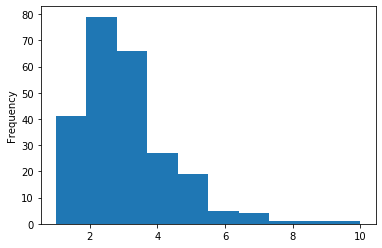

In [0]:
import matplotlib.pyplot as plt
tips.tip.plot(kind='hist')
plt.show()

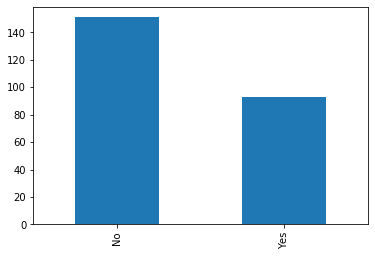

In [0]:
cts = tips.smoker.value_counts()
cts.plot(kind='bar')

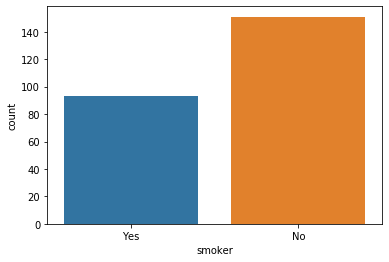

In [0]:
sns.countplot(x='smoker',data=tips)

In [0]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

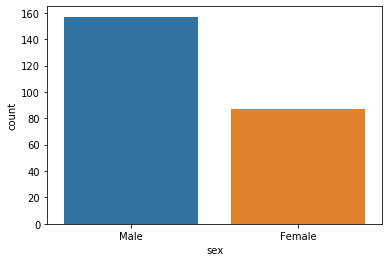

In [0]:
sns.countplot(x='sex',data=tips)

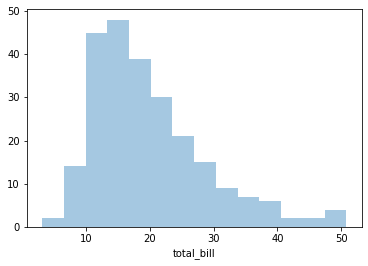

In [0]:
sns.distplot(tips.total_bill,kde=False)

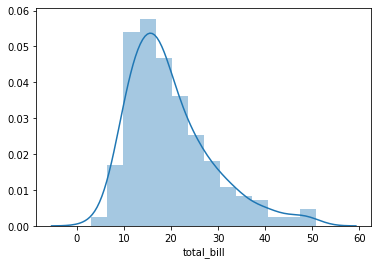

In [0]:
sns.distplot(tips.total_bill,kde=True)

In [0]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

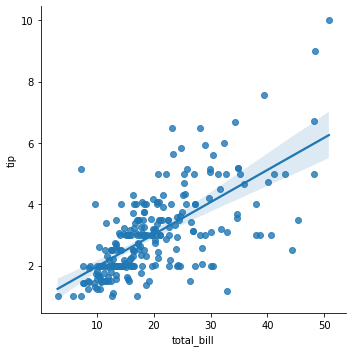

In [0]:
sns.lmplot(x='total_bill',y='tip',data = tips)

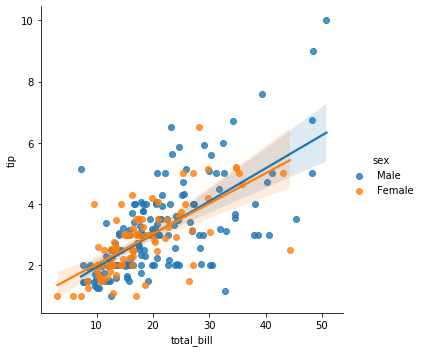

In [0]:
sns.lmplot(x='total_bill',y='tip',data = tips,hue='sex') # index the sex over plot wiht "sex"

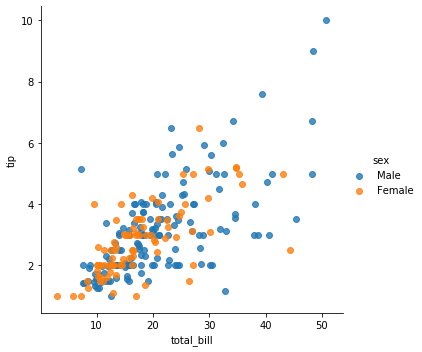

In [0]:
sns.lmplot(x='total_bill',y='tip',data = tips,hue='sex',fit_reg=False) 
# avoid the line plotting

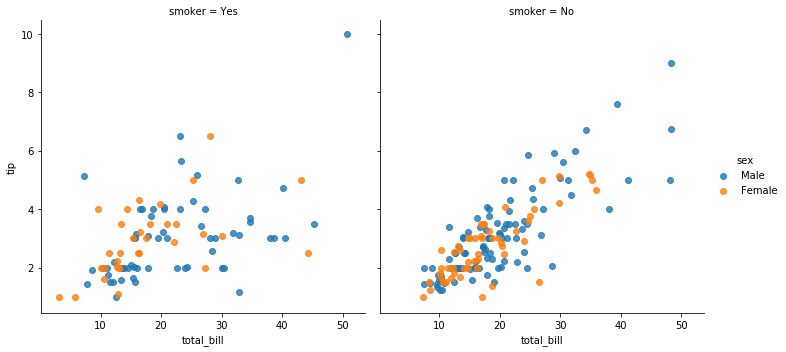

In [0]:
sns.lmplot(x='total_bill',y='tip',data = tips,hue='sex',
           fit_reg = False,col='smoker') 
 # index the sex over plot wiht "sex"
 #col- subsetting the dataset

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


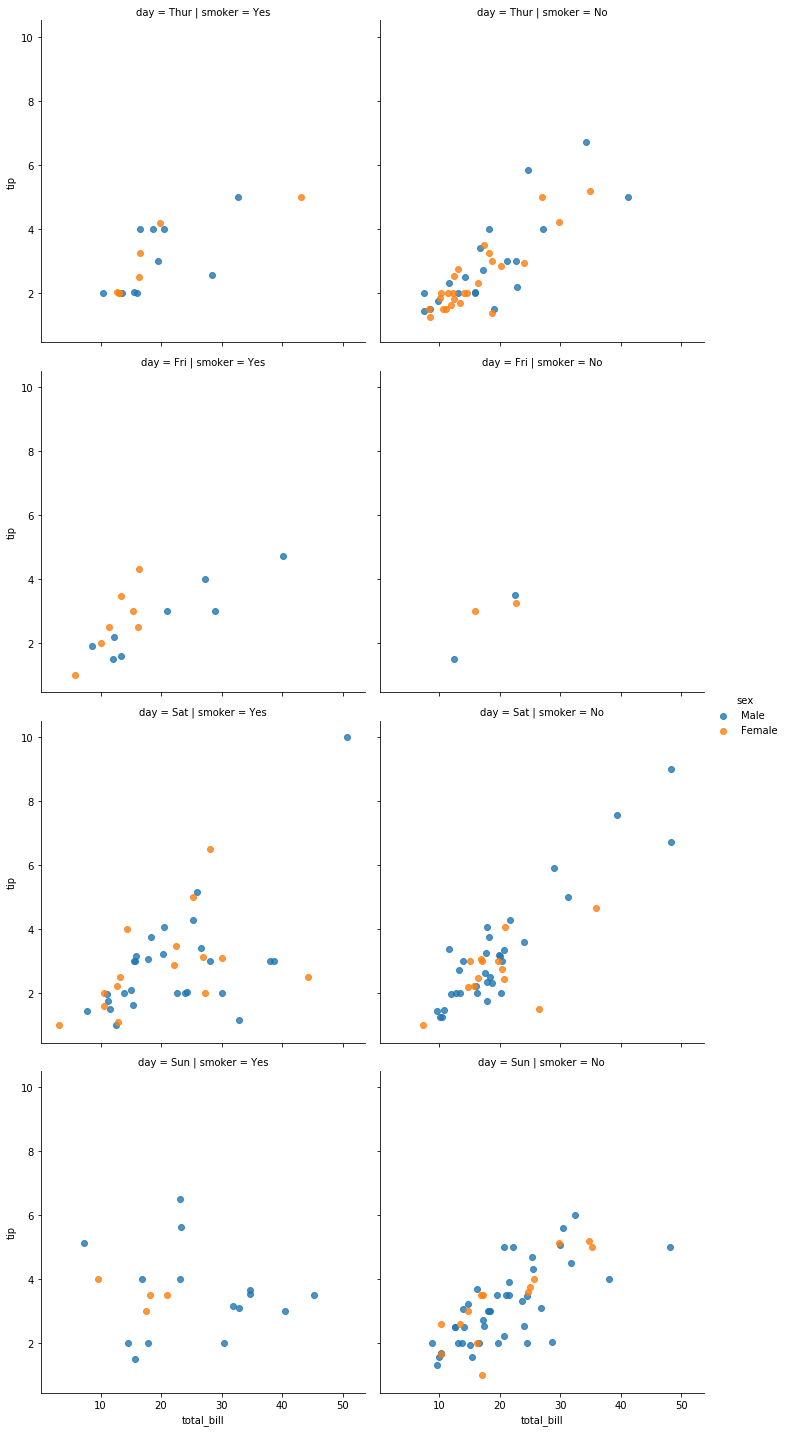

In [0]:
sns.lmplot(x='total_bill',y='tip',data = 
           tips,hue='sex',fit_reg=False,col='smoker',row='day')
 # index the sex over plot wiht "sex"
 # col - will be plot the x,y with variation of smoker='YES/NO'
 # row - count unique items - plot those varities, subsetting the data

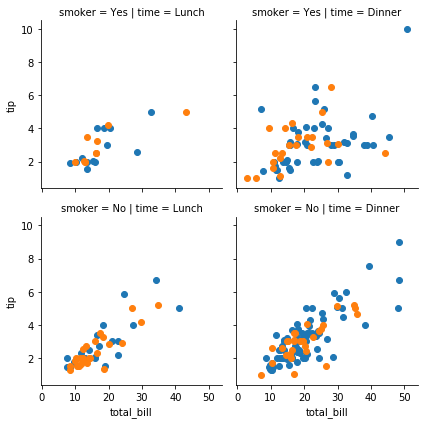

In [0]:
facet = sns.FacetGrid(tips,col='time',row='smoker',hue='sex')
#map like apply function
facet.map(plt.scatter,'total_bill','tip')


# sub plosts

In [0]:
a,b=[1,2]

In [0]:
a

1

In [0]:
b

2

In [0]:
# Version 3.1.2matplotlibFork me on GitHub
# Installation
# Documentation
# Examples
# Tutorials
# Contributing
# indexmodules |home| contents »
# Quick search
# Related Topics
# Documentation overview
# Show Page Source
# Anatomy of a figure
# This figure shows the name of several matplotlib elements composing a figure

# ../../_images/sphx_glr_anatomy_001.png
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()
Copy to clipboard
Download Python source code: anatomy.py
Download Jupyter notebook: anatomy.ipynb
© Copyright 2002 - 2012 John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team; 2012 - 2018 The Matplotlib development team.
Last updated on Jan 05, 2020. Created using Sphinx 1.8.5. Doc version v3.1.1-79-g90d53b526.

SyntaxError: ignored

In [0]:
![](https://matplotlib.org/gallery/showcase/anatomy.html)

/bin/bash: -c: line 0: syntax error near unexpected token `https://matplotlib.org/gallery/showcase/anatomy.html'
/bin/bash: -c: line 0: `[](https://matplotlib.org/gallery/showcase/anatomy.html)'


![](https://matplotlib.org/gallery/showcase/anatomy.html)

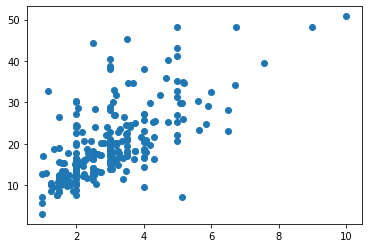

In [0]:
fig,(ax) = plt.subplots(1,1)
ax.scatter(tips.tip,tips.total_bill)

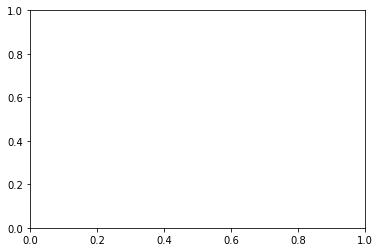

In [0]:
fig,(ax) = plt.subplots(1,1)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

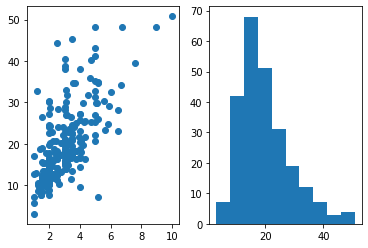

In [0]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.scatter(tips.tip,tips.total_bill)
ax2.hist(tips.total_bill)

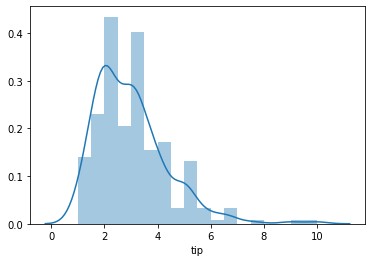

In [0]:
dis = sns.distplot(tips.tip)

In [0]:
type(dis)

matplotlib.axes._subplots.AxesSubplot

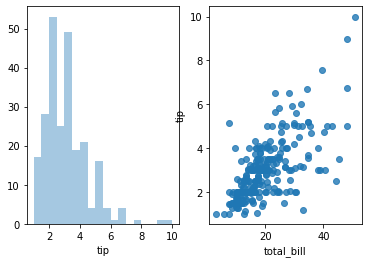

In [0]:
# use the seaborn in maptplotlib
fig,(ax1,ax2) = plt.subplots(1,2)
sns.distplot(tips.tip,ax=ax1,kde=False)
sns.regplot(x='total_bill',y='tip',data=tips,ax=ax2,fit_reg=False)

In [0]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# 05-model

In [0]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model


In [0]:
from seaborn import load_dataset
tips = load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
X = tips.loc[:['total_bill']]

In [0]:
lr = linear_model.LinearRegression(fit_intercept=True,normalize=True)

In [0]:
lr.fit(X=tips[['total_bill','size']],y=tips['tip'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
lr.coef_

array([0.09271334, 0.19259779])

In [0]:
lr.intercept_

0.6689447408125031

In [0]:
# dummy encodeing
tips.columns[tips.dtypes=='object']

Index([], dtype='object')

In [0]:
tips_dummy = pd.get_dummies(tips,drop_first=True)
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [0]:
lr = linear_model.LinearRegression()
lr.fit(X=tips_dummy.iloc[:,2:],y=tips_dummy['tip'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lr.coef_

array([ 0.71001644, -0.10057881, -0.20916402, -0.20180568, -0.36603136,
       -0.29452609,  0.48575489])

In [0]:
lr.coef_

array([ 0.71001644, -0.10057881, -0.20916402, -0.20180568, -0.36603136,
       -0.29452609,  0.48575489])

In [0]:
lr.intercept_

1.2266556388785939

# Exercise
## part 1 --introduction
**Load the tips dataset from seaboan**

In [0]:
import seaborn as sns
from seaborn import load_dataset
tips = sns.load_dataset('tips')

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Filter rows by `smoker == 'No'` and `total_bill >= 10`

In [0]:
tips.loc[(tips['smoker'] =='No') & (tips.total_bill >= 10)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
235,10.07,1.25,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,1.75,Male,No,Sat,Dinner,2


In [0]:
tips.loc[(tips['smoker'] =='No') | (tips.total_bill >= 10)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# What is the average total_bill for each value of smoker,day,and time

In [0]:
tips.groupby(['smoker','day','time'])['total_bill'].mean().reset_index()

,smoker,day,time,total_bill
0,Yes,Thur,Lunch,19.190588
1,Yes,Thur,Dinner,NaN
2,Yes,Fri,Lunch,12.323333
3,Yes,Fri,Dinner,19.806667
4,Yes,Sat,Lunch,NaN
5,Yes,Sat,Dinner,21.276667
6,Yes,Sun,Lunch,NaN
7,Yes,Sun,Dinner,24.120000
8,No,Thur,Lunch,17.075227
9,No,Thur,Dinner,18.780000


# Part 2 --Tidy

Taken from the r4ds "Tidy Data" Chapter: https://r4ds.had.co.nz/exploratory-data-analysis.html

In [0]:
import pandas as pd

tbl1 = pd.read_csv('/content/sample_data/table1.csv')
tbl1
tbl2 = pd.read_csv('/content/sample_data/table2.csv')
tbl3 = pd.read_csv('/content/sample_data/table3.csv')

In [0]:
tbl2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [0]:
tbl2.pivot_table(index=['country','year'],columns='type',values='count')

type               cases  population
country     year                    
Afghanistan 1999     745    19987071
            2000    2666    20595360
Brazil      1999   37737   172006362
            2000   80488   174504898
China       1999  212258  1272915272
            2000  213766  1280428583

In [0]:
tbl2.pivot_table(index=['country','year'],columns='type',values='count').reset_index()

type,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


# Tidy give me the population

In [0]:
tbl3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [0]:
# exatract the poputaion from rate with help str function
tbl3['population_dummy'] = tbl3['rate'].str.split('/').str.get(0)

In [0]:
tbl3

,country,year,rate,population_dummy
0,Afghanistan,1999,745/19987071,745
1,Afghanistan,2000,2666/20595360,2666
2,Brazil,1999,37737/172006362,37737
3,Brazil,2000,80488/174504898,80488
4,China,1999,212258/1272915272,212258
5,China,2000,213766/1280428583,213766


In [0]:
# exatract the poputaion from rate with help str function
tbl3['population'] = tbl3['rate'].str.split('/').str.get(1)

In [0]:
tbl3

,country,year,rate,population_dummy,population
0,Afghanistan,1999,745/19987071,745,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360
2,Brazil,1999,37737/172006362,37737,172006362
3,Brazil,2000,80488/174504898,80488,174504898
4,China,1999,212258/1272915272,212258,1272915272
5,China,2000,213766/1280428583,213766,1280428583


# Part 3 -- Apply functions
Look at the table3 dataset

### Write a function that takes a value of `rate` and parses out the total population.

In [0]:
tbl3.dtypes

country             object
year                 int64
rate                object
population_dummy    object
population          object
dtype: object

In [0]:
def extract_poluation(rate,delim='/',position=1):
    pop = rate.split(delim)[position]
    return int(pop)

In [0]:
assert extract_poluation('123/456') == 456

In [0]:
pops = tbl3['rate'].apply(extract_poluation)
pops

0      19987071
1      20595360
2     172006362
3     174504898
4    1272915272
5    1280428583
Name: rate, dtype: int64

In [0]:
tbl3['pop'] = pops
tbl3

,country,year,rate,population_dummy,population,pop
0,Afghanistan,1999,745/19987071,745,19987071,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360,20595360
2,Brazil,1999,37737/172006362,37737,172006362,172006362
3,Brazil,2000,80488/174504898,80488,174504898,174504898
4,China,1999,212258/1272915272,212258,1272915272,1272915272
5,China,2000,213766/1280428583,213766,1280428583,1280428583


In [0]:
tbl3['pop2'] = tbl3['rate'].apply(extract_poluation);tbl3

,country,year,rate,population_dummy,population,pop,pop2
0,Afghanistan,1999,745/19987071,745,19987071,19987071,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360,20595360,20595360
2,Brazil,1999,37737/172006362,37737,172006362,172006362,172006362
3,Brazil,2000,80488/174504898,80488,174504898,174504898,174504898
4,China,1999,212258/1272915272,212258,1272915272,1272915272,1272915272
5,China,2000,213766/1280428583,213766,1280428583,1280428583,1280428583


# Part 4 -- plost

In [0]:
from seaborn import load_dataset
titanic = load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Create a figure with 2 axes
## distplot of fare in one axes
## boxplot of class and fare on the other axes


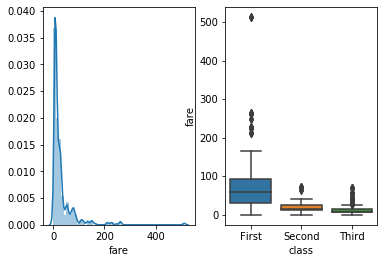

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2)
sns.distplot(titanic.fare,ax=ax1)
sns.boxplot(x='class',y='fare',data=titanic,ax=ax2)

# part 4 --Modules -->

In [0]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


 # Subset survied,class,who

In [0]:
titanic_subset = titanic[['survived','class','who']]
titanic_subset

,survived,class,who
0,0,Third,man
1,1,First,woman
2,1,Third,woman
3,1,First,woman
4,0,Third,man
...,...,...,...
886,0,Second,man
887,1,First,woman
888,0,Third,woman
889,1,First,man


In [0]:
titanic_dummy = pd.get_dummies(titanic_subset,drop_first=True)
titanic_dummy

,survived,class_Second,class_Third,who_man,who_woman
0,0,0,1,1,0
1,1,0,0,0,1
2,1,0,1,0,1
3,1,0,0,0,1
4,0,0,1,1,0
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,0,0,1
888,0,0,1,0,1
889,1,0,0,1,0


In [0]:
from sklearn.linear_model import LogisticRegression
X = titanic_dummy.iloc[:, 1:]
y = titanic_dummy.iloc[:, 0]
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

In [0]:
clf.coef_

array([[-0.46549873, -1.01898083, -1.23823732,  0.20337229]])

In [0]:
clf.intercept_

array([1.00231802])